In [25]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.logit_estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx
from tqdm import tqdm
import pickle



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Analysis of the nodes on the sigma est

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import pickle

def run_experiment(n_values, d, sigma, warm_up, max_iterations, patience, n_runs):
    results = {}
    
    for n in tqdm(n_values, desc="Processing different n values"):
        n_results = []
        
        for _ in range(n_runs):
            graph_model = graph.GraphModel(n=n, d=d, sigma=sigma)
            graphs, _ = graph_model.populate_edges_baseline(warm_up=warm_up, max_iterations=max_iterations, patience=patience)
            g = graphs[-1]
            
            est = estimator.LogitRegEstimator(g, d=d)
            features, labels = est.get_features_labels()
            result, params, _ = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)
            
            summary = result.summary2().tables[1].loc['const']
            coef = summary.loc['Coef.']
            lower_bound = summary.loc['[0.025']
            upper_bound = summary.loc['0.975]']
            n_results.append((coef, lower_bound, upper_bound))
        
        results[n] = n_results
    
    return results

# Experiment parameters
n_values = [100, 500, 1000]
d = 0
sigma = -2
warm_up = 30000
max_iterations = 30000
patience = 10
n_runs = 1

# Run the experiment
results = run_experiment(n_values, d, sigma, warm_up, max_iterations, patience, n_runs)

# Save results
pathfolder = 'runs/n_influence_experiment'
os.makedirs(pathfolder, exist_ok=True)
with open(f'{pathfolder}/n_influence_results.pkl', 'wb') as f:
    pickle.dump(results, f)

Processing different n values:   0%|          | 0/3 [00:00<?, ?it/s]

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
Processing different n values:  33%|███▎      | 1/3 [00:01<00:02,  1.26s/it]

                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.393     
Date:               2024-10-19 22:06 AIC:              85.8500   
No. Observations:   4950             BIC:              105.3714  
Df Model:           2                Log-Likelihood:   -39.925   
Df Residuals:       4947             LL-Null:          -65.781   
Converged:          1.0000           LLR p-value:      5.8998e-12
No. Iterations:     41.0000          Scale:            1.0000    
------------------------------------------------------------------
          Coef.    Std.Err.     z     P>|z|     [0.025     0.975] 
------------------------------------------------------------------
const   -566.6475   94.9720  -5.9665  0.0000  -752.7892  -380.5057
x1         2.7785    0.4842   5.7380  0.0000     1.8294     3.7276
x2         3.0443    0.6852   4.4427  0.0000     1.7013     4.3874

iteration: 0
iteration: 1
ite

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
Processing different n values:  67%|██████▋   | 2/3 [00:07<00:04,  4.43s/it]

                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.004      
Date:               2024-10-19 22:07 AIC:              126833.0468
No. Observations:   124750           BIC:              126862.2490
Df Model:           2                Log-Likelihood:   -63414.    
Df Residuals:       124747           LL-Null:          -63697.    
Converged:          1.0000           LLR p-value:      7.6522e-124
No. Iterations:     19.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -3.8827     0.1079   -35.9928   0.0000   -4.0941   -3.6713
x1         0.0119     0.0007    16.0614   0.0000    0.0104    0.0133
x2         0.0126     0.0007    17.5845   0.0000    0.0112    0.0140

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
Processing different n values: 100%|██████████| 3/3 [01:22<00:00, 27.45s/it]

                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.005      
Date:               2024-10-19 22:08 AIC:              209864.2594
No. Observations:   499500           BIC:              209897.6235
Df Model:           2                Log-Likelihood:   -1.0493e+05
Df Residuals:       499497           LL-Null:          -1.0549e+05
Converged:          1.0000           LLR p-value:      4.7081e-246
No. Iterations:     19.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -4.9779     0.0639   -77.8417   0.0000   -5.1032   -4.8525
x1         0.0194     0.0008    23.8495   0.0000    0.0178    0.0210
x2         0.0193     0.0008    23.8169   0.0000    0.0177    0.0209



In [23]:
results

{100: [(-566.647482120924, -752.7892220750298, -380.50574216681815)],
 500: [(-3.882684100766566, -4.094112939318285, -3.671255262214847)],
 1000: [(-4.977877621873141, -5.10321489556574, -4.852540348180542)]}

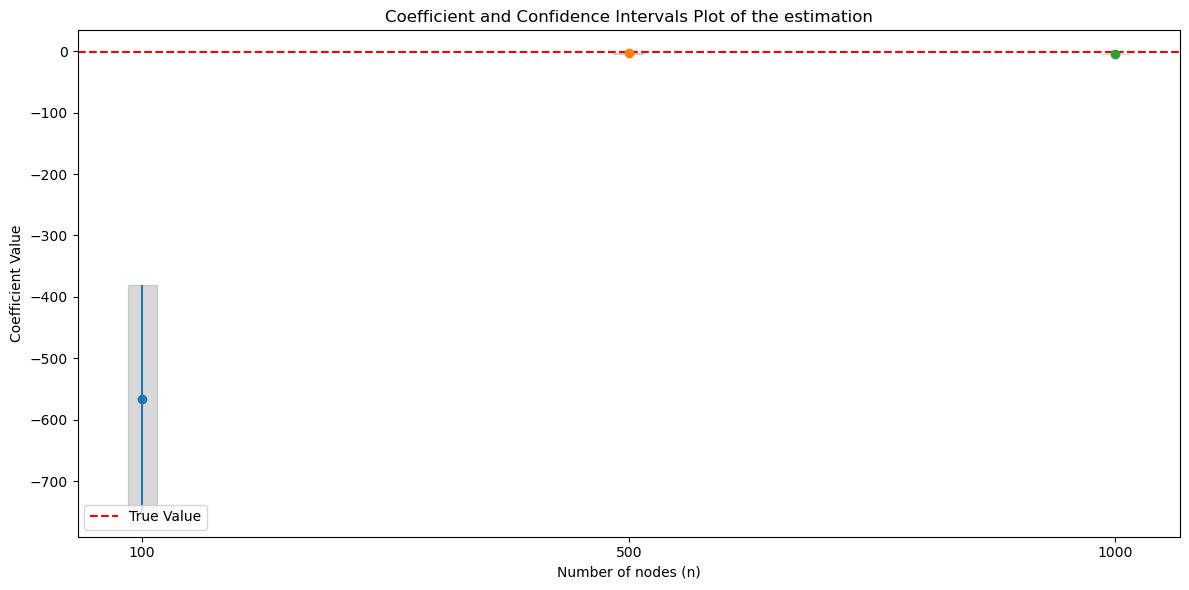

In [22]:
# Plot results
fig, ax = plt.subplots(figsize=(12, 6))

for i, n in enumerate(n_values):
    for j, (coef, lower_bound, upper_bound) in enumerate(results[n]):
        x = i + (j - len(results[n])/2 + 0.5) * 0.1  # Spread points horizontally
        ax.errorbar(x, coef, yerr=[[coef - lower_bound], [upper_bound - coef]], fmt='o')
        ax.fill_between([x-0.03, x+0.03], lower_bound, upper_bound, color='gray', alpha=0.3)

ax.set_xticks(range(len(n_values)))
ax.set_xticklabels(n_values)
ax.axhline(y=sigma, color='r', linestyle='--', label='True Value')
ax.set_xlabel('Number of nodes (n)')
ax.set_ylabel('Coefficient Value')
ax.set_title('Coefficient and Confidence Intervals Plot of the estimation')
ax.legend()

plt.tight_layout()
#plt.savefig(f'{pathfolder}/n_influence_plot.png')
plt.show()

# Analysis of the sigma est during the iterations

In [38]:
def run_experiment(n_values, d, sigma, warm_up, max_iterations, patience, n_runs, estimation_interval=100):
    results = {}
    
    for n in tqdm(n_values, desc="Processing different n values"):
        n_results = []
        
        for run in range(n_runs):
            graph_model = graph.GraphModel(n=n, d=d, sigma=sigma)
            sigma_estimates = []
            
            for i in range(0, max_iterations + 1, estimation_interval):
                if i == 0:
                    graphs = [graph_model.graph.copy()]
                else:
                    for _ in range(estimation_interval):
                        graph_model.add_remove_edge()
                    graphs = [graph_model.graph.copy()]
                
                g = graphs[-1]
                est = estimator.LogitRegEstimator(g, d=d)
                features, labels = est.get_features_labels()
                try:
                    result, params, _ = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)
                    summary = result.summary2().tables[1].loc['const']
                    coef = summary.loc['Coef.']
                except np.linalg.LinAlgError:
                    # Handle singular matrix error
                    print(f"Singular matrix encountered at iteration {i} for n={n}, run={run}")
                    coef = np.nan
                except Exception as e:
                    # Handle any other unexpected errors
                    print(f"Error at iteration {i} for n={n}, run={run}: {str(e)}")
                    coef = np.nan
                
                sigma_estimates.append((i, coef))
            
            n_results.append(sigma_estimates)
        
        results[n] = n_results
    
    return results

# Experiment parameters
n_values = [500]
d = 0
sigma = -6
warm_up = 100000 
max_iterations = 100000 
patience = 10
n_runs = 1
estimation_interval = 5000

results = run_experiment(n_values, d, sigma, warm_up, max_iterations, patience, n_runs, estimation_interval)
pathfolder = 'runs/sigma_evolution_experiment'
os.makedirs(pathfolder, exist_ok=True)
with open(f'{pathfolder}/sigma_evolution_results.pkl', 'wb') as f:
    pickle.dump(results, f)

Processing different n values:   0%|          | 0/1 [00:00<?, ?it/s]

Singular matrix encountered at iteration 0 for n=500, run=0


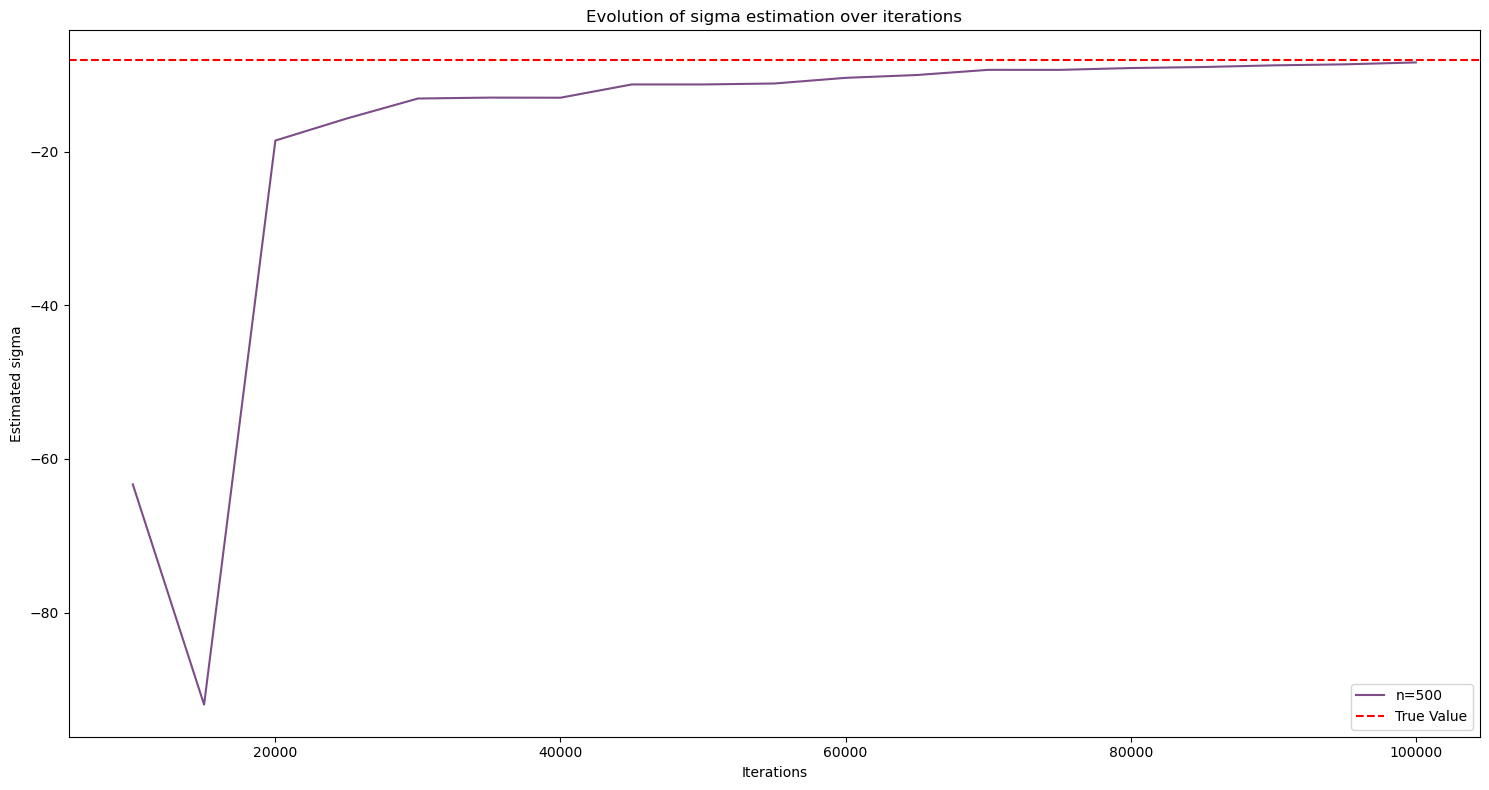

Final sigma estimates:
n = 500:
  Mean: -8.3785
  Std Dev: 0.0000
  Relative Error: 4.73%



In [ ]:
# Plot results
fig, ax = plt.subplots(figsize=(15, 8))

colors = plt.cm.viridis(np.linspace(0, 1, len(n_values)))

for i, n in enumerate(n_values):
    for run in range(n_runs):
        iterations, estimates = zip(*results[n][run])
        ax.plot(iterations, estimates, color=colors[i], alpha=0.7, label=f'n={n}' if run == 0 else "")

ax.axhline(y=sigma, color='r', linestyle='--', label='True Value')
ax.set_xlabel('Iterations')
ax.set_ylabel('Estimated sigma')
ax.set_title('Evolution of sigma estimation over iterations')
ax.legend()

plt.tight_layout()
plt.savefig(f'{pathfolder}/sigma_evolution_plot.png')
plt.show()

# Print final estimates
print("Final sigma estimates:")
for n in n_values:
    final_estimates = [run[-1][1] for run in results[n]]
    mean_estimate = np.mean(final_estimates)
    std_estimate = np.std(final_estimates)
    print(f"n = {n}:")
    print(f"  Mean: {mean_estimate:.4f}")
    print(f"  Std Dev: {std_estimate:.4f}")
    print(f"  Relative Error: {abs(mean_estimate - sigma) / abs(sigma) * 100:.2f}%")
    print()

# Run Multiple times

In [53]:
n_runs = 1

n = 1000
d = 0
sigma = 2
warm_up = 3000
max_iterations = 5000

pathfolder = f'runs/est_sigma_d_multiple{abs(sigma)}'

# Create the directory if it does not exist
if not os.path.exists(pathfolder):
    os.makedirs(pathfolder)

In [66]:
import pickle

params_list = []
result_list = []

for i in range(n_runs):
    graph_model = graph.GraphModel(n=n, d=d, sigma=sigma)
    graphs, spec = graph_model.populate_edges_baseline( warm_up = warm_up, max_iterations = max_iterations, patience = 50 )
    g = graphs[-1]
    import gc
    del graphs
    gc.collect()

    est = estimator.LogitRegEstimator(g, d=d)

    features, labels = est.get_features_labels()
    result, params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)

    params_list.append(params)
    result_list.append(result)

    with open(f'{pathfolder}/results_array_{i}.pkl', 'wb') as f:
        pickle.dump(result_list, f)


iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

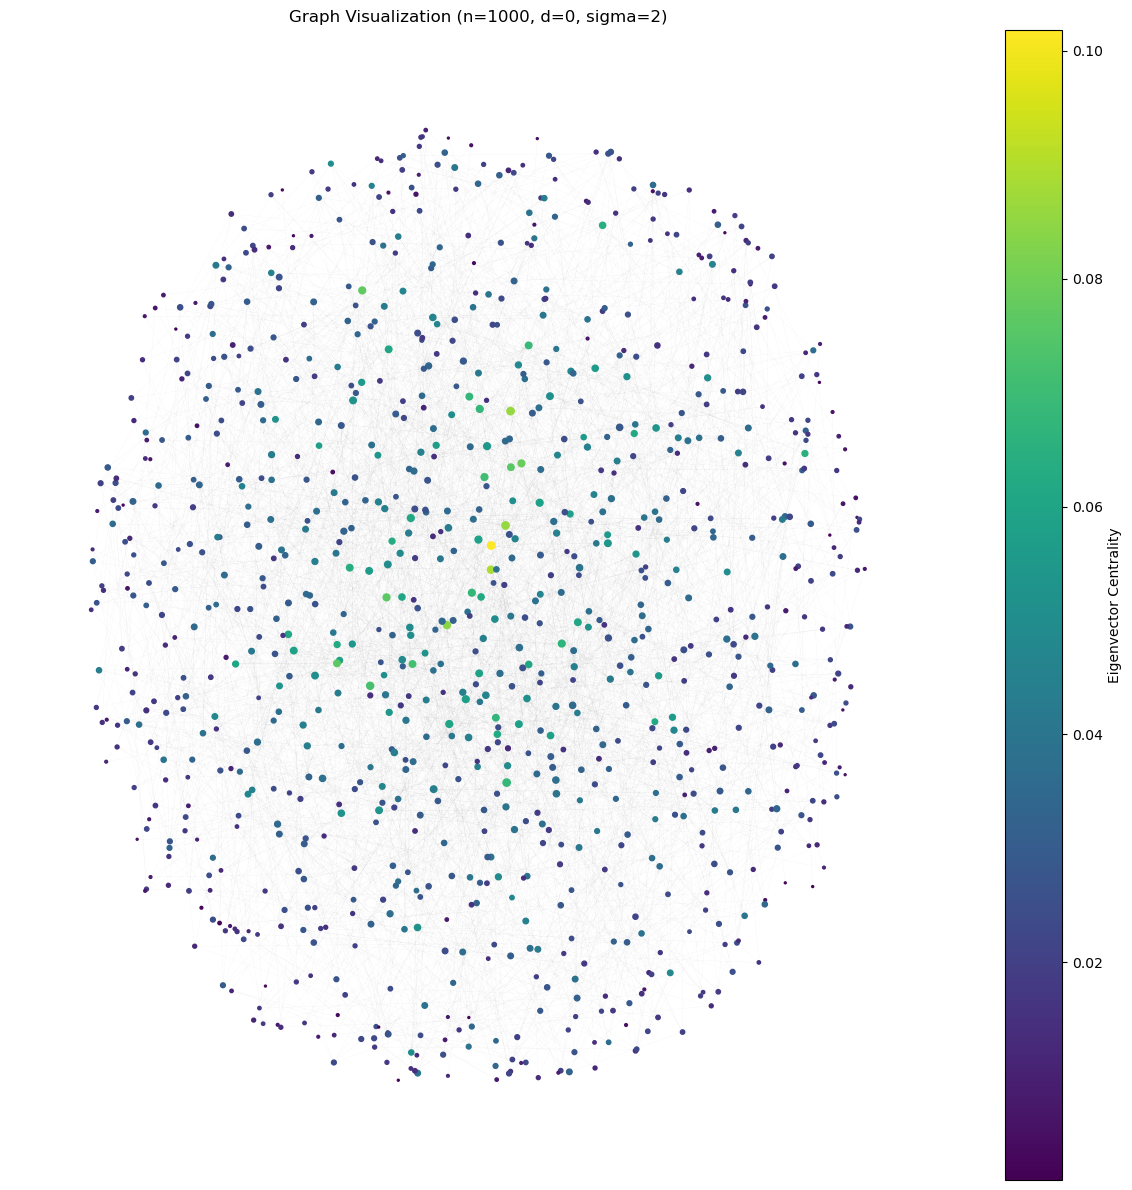

Number of nodes: 1000
Number of edges: 2955
Average degree: 5.91
Maximum degree: 14
Minimum degree: 1


In [67]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G = nx.from_numpy_array(g)

# Calculate node degrees
degrees = dict(G.degree())
node_sizes = [v * 2 for v in degrees.values()]  # Scale node sizes based on degree

# Use a faster layout algorithm for large graphs
if G.number_of_nodes() > 1000:
    pos = nx.random_layout(G)
else:
    pos = nx.spring_layout(G, k=0.5, iterations=50)

fig, ax = plt.subplots(figsize=(12, 12))

# Draw edges with low alpha for better visibility
nx.draw_networkx_edges(G, pos, alpha=0.1, width=0.1, ax=ax)

# Draw nodes with size based on degree and color based on centrality
node_color = list(nx.eigenvector_centrality(G).values())
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_color, 
                               cmap=plt.cm.viridis, alpha=1, ax=ax)

ax.set_title(f"Graph Visualization (n={n}, d={d}, sigma={sigma})")
ax.axis('off')
plt.tight_layout()

# Add a colorbar to show centrality
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Eigenvector Centrality')

plt.show()

# Print some basic graph statistics
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average degree: {np.mean(list(degrees.values())):.2f}")
print(f"Maximum degree: {max(degrees.values())}")
print(f"Minimum degree: {min(degrees.values())}")

# analysis

In [10]:

summary = result_list[0].summary2()
summary.tables[1].loc['const']

NameError: name 'result_list' is not defined

-27.387002059835698


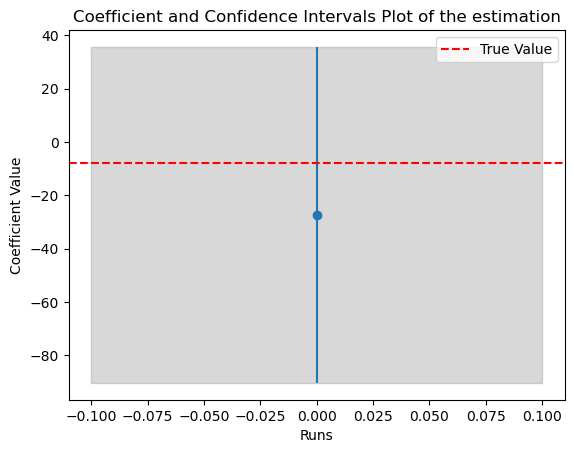

In [37]:
import matplotlib.pyplot as plt

# Assume results_array is your list of Pandas Series
fig, ax = plt.subplots()
for i, summary in enumerate(result_list):
    result = summary.summary2().tables[1].loc['const']
    coef = result.loc['Coef.']
    lower_bound = result.loc['[0.025']
    upper_bound = result.loc['0.975]']
    print(coef)
    ax.errorbar(i, coef, yerr=[[coef - lower_bound], [upper_bound - coef]], fmt='o')
    ax.fill_between([i-0.1, i+0.1], lower_bound, upper_bound, color='gray', alpha=0.3)

ax.axhline(y=sigma, color='r', linestyle='--', label='True Value')
ax.set_xlabel('Runs')
ax.set_ylabel('Coefficient Value')
ax.set_title('Coefficient and Confidence Intervals Plot of the estimation')
ax.legend()

# Show plot
plt.show()
